After single neuron analysis was performed, neurons were down selected for the subsequent analyses. Error neurons were then selected based on neurons that had a p_value < 0.05 from a t test comparing a neuron's correct trial spike counts to it's error trial spike counts. A permuatation test was then performed to verify that the number of neurons of error neurons selected were significantly greater than a standard distribution. Below are the functions used to perform permuations and visualize the results by region (HIP and AMY).  

In [2]:
# Install required packages
!pip install numpy scipy matplotlib

In [5]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from data_analysis.data_loading import load_data

def bin_spikes(data):

    #button press event times were flattened from 2d array to 1d-> need length of data set to correctly index
    bpIndex = int(len(data['events'])/2)

    for i in range(len(data['answers'])):

        stimulusStartTime, stimulusEndTime = data['events'][i] - (0.5 * 1_000_000), data['events'][i] + (1.5 * 1_000_000)
        bpStartTime, bpEndTime = data['events'][i + bpIndex] - (0.5 * 1_000_000), data['events'][i + bpIndex] + (1.5 * 1_000_000)

        #stimulus spike times in time window, relative to event time
        stimTimesSpikeCount=data['timestampsOfCell'][(data['timestampsOfCell'] >= stimulusStartTime +(0.5 * 1_000_000)) & (data['timestampsOfCell'] <= stimulusEndTime-(1.0 *1_000_000))]-data['events'][i]

        data['stimSpikeCount'].append(len(stimTimesSpikeCount))

        #bp spike times in time window, relative to event time
        bpTimesSpikeCount=data['timestampsOfCell'][(data['timestampsOfCell'] >= bpStartTime + (0.5 * 1_000_000)) & (data['timestampsOfCell'] <= bpEndTime-(.5*1_000_000))]-data['events'][i+bpIndex]

        data['bpSpikeCount'].append(len(bpTimesSpikeCount))
        
        if data['answers'][i] == data['colorsPresented'][i]:
            data['labels'].append(1)
  
        else:
            #add label for incorrect trial-> 0 (roc curve)
            data['labels'].append(0)

    return data  
                   

#return list with the size of input specified. Numbers are 0 or 1
def permutate(spike_counts, labels, num_trials):
      
    results = np.zeros(num_trials, dtype=int)
    
    for i in range(num_trials):
        # Shuffle the spike counts while keeping the labels unchanged
        shuffled_spike_counts = np.copy(spike_counts)  # Create a copy of the spike counts to shuffle
        random.shuffle(shuffled_spike_counts)  # Shuffle the spike counts
        
        # Create the correct and error trials based on the labels (1 for correct, 0 for error)
        correct_trials = shuffled_spike_counts[np.array(labels) == 1]
        error_trials = shuffled_spike_counts[np.array(labels) == 0]

        # Validate data
        if len(correct_trials) == 0 or len(error_trials) == 0:
            print("Not enough data for t-test. Skipping iteration.")
            continue

        if np.var(correct_trials) < 1e-10 or np.var(error_trials) < 1e-10:
            print("Variance too small for t-test. Skipping iteration.")
            continue

        t_val, p_val, = ttest_ind(correct_trials, error_trials, equal_var=False ) 

        if p_val < .05:
            results[i] = 1
        else:
            results[i] = 0
        
    return results

def plot_data(all_results, name):
        # Compute the percentage of 1's in each position across all files
    all_results_array = np.array(list(all_results.values()))
    percent_error_neurons = np.mean(all_results_array == 1, axis=0) * 100

    plt.figure(figsize=(10, 5))
    plt.hist(percent_error_neurons, bins=30, alpha=0.7, color='blue')  # Adjust the number of bins as needed
    plt.xlabel("Percentage of Error Neurons (%)")
    plt.ylabel("Count")
    plt.title("Distribution of Percentage of Error Neurons Across Permutations")
    plt.grid(visible=True)
    plt.savefig(name)
        

Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. Skipping iteration.
Variance too small for t-test. 

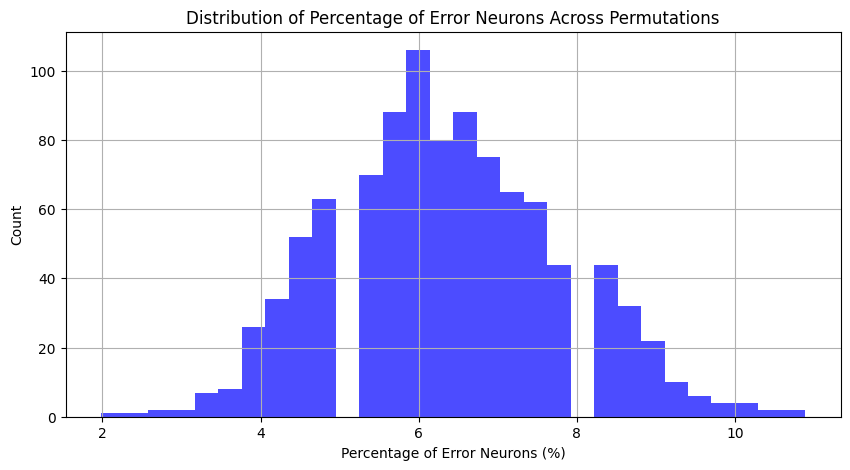

Variance too small for t-test. Skipping iteration.


KeyboardInterrupt: 

In [7]:
# Permutation of HIP neurons  
all_results={}
mat_folder_hip = 'neurons/hip_all_neurons/'
for file in os.listdir(mat_folder_hip):
    file_path = os.path.join(mat_folder_hip,file)
    raw_data = load_data(file_path)
    data = bin_spikes(raw_data)
    file_result=permutate(data['bpSpikeCount'],data['labels'],num_trials=1000)
    all_results[file]=file_result

# Compute the percentage of 1's in each position across all files
all_results_array = np.array(list(all_results.values()))
percent_error_neurons = np.mean(all_results_array == 1, axis=0) * 100

plt.figure(figsize=(10, 5))
plt.hist(percent_error_neurons, bins=30, alpha=0.7, color='blue')  # Adjust the number of bins as needed
plt.xlabel("Percentage of Error Neurons (%)")
plt.ylabel("Count")
plt.title("HIP Distribution of Percentage of Error Neurons Across Permutations")
plt.grid(visible=True)
plt.savefig('outputs/hip_error_neuron_permutation_histogram.png')
plt.show()

# Permutation of AMY neurons
all_results2={}
mat_folder_amy = 'neurons/amy_all_neurons/'
for file in os.listdir(mat_folder_amy):
    file_path = os.path.join(mat_folder_amy,file)
    raw_data = load_data(file_path)
    data = bin_spikes(raw_data)
    file_result2=permutate(data['bpSpikeCount'],data['labels'],num_trials=1000)
    all_results2[file]=file_result2

# Compute the percentage of 1's in each position across all files
all_results_array2 = np.array(list(all_results2.values()))
percent_error_neurons2 = np.mean(all_results_array2 == 1, axis=0) * 100

plt.figure(figsize=(10, 5))
plt.hist(percent_error_neurons2, bins=30, alpha=0.7, color='blue')  # Adjust the number of bins as needed
plt.xlabel("Percentage of Error Neurons (%)")
plt.ylabel("Count")
plt.title("AMY Distribution of Percentage of Error Neurons Across Permutations")
plt.grid(visible=True)
plt.savefig('outputs/amy_error_neuron_permutation_histogram.png')
plt.show()